In [90]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords

In [91]:
# To see complete width of tweet column

pd.set_option("display.max_colwidth", 200)

In [92]:
df = pd.read_csv('spam.csv')

In [99]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [100]:
comment_words = ""
for val in df.v2:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

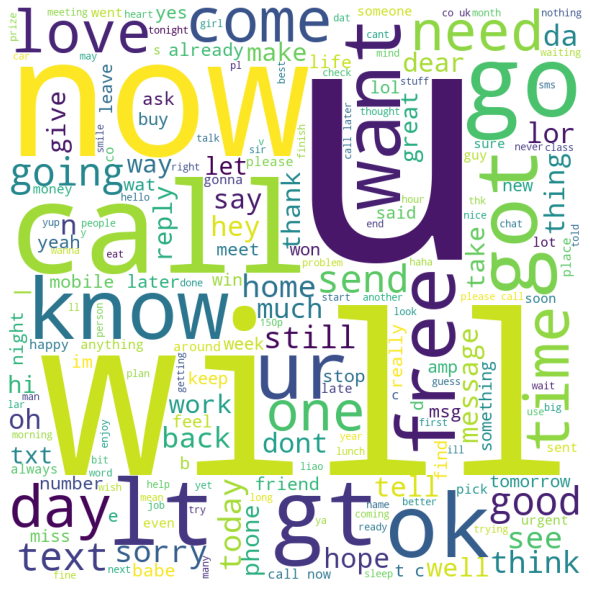

In [101]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Plotting the wordcloud for ham and spam seperately

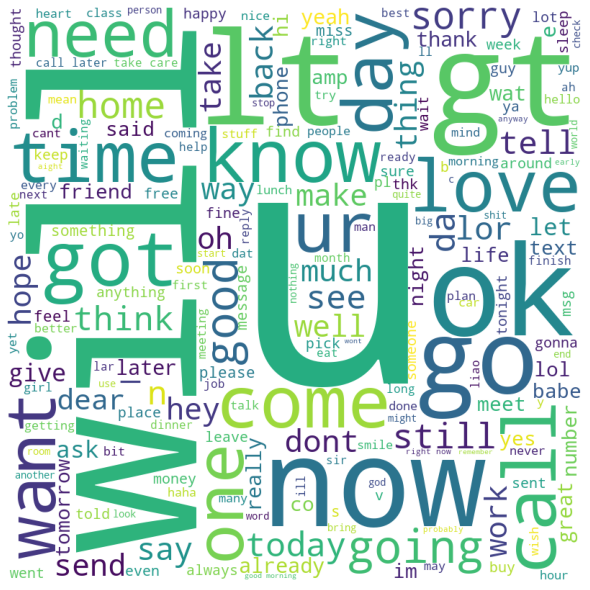

In [102]:
ham_words = ""
for val in h.v2:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    ham_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(ham_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

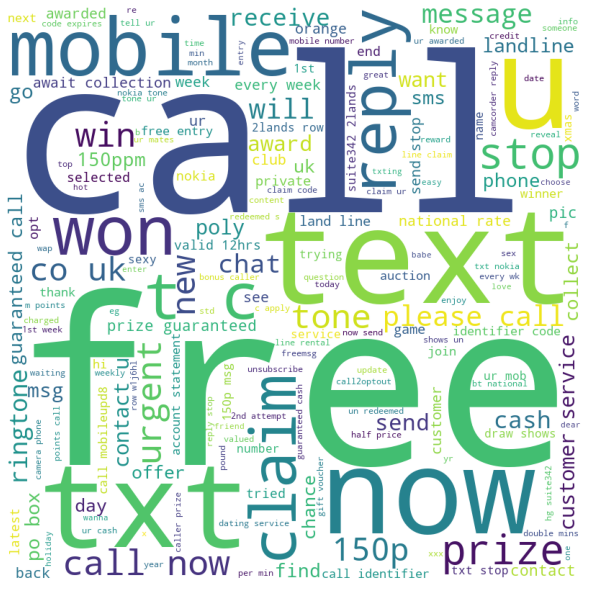

In [103]:
spam_words = ""
for val in s.v2:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    spam_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(spam_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Data Cleaning

In [104]:
df['v2'] = df['v2'].apply(lambda x : x.lower())

In [105]:


df['v2'] = df['v2'].apply(lambda x : re.sub('[^a-zA-Z0-9]+',' ',x))

In [106]:
df.head()

,v1,v2
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives around here though


In [107]:
from nltk.tokenize import word_tokenize
  
df['v2'] = df['v2'].apply(lambda x : word_tokenize(x))

In [108]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 

df['v2'] = df['v2'].apply(lambda y :  [lemmatizer.lemmatize(w) for w in y])

In [109]:
df['v2'] = df['v2'].apply(lambda y : ' '.join(w for w in y))

In [110]:
df.head()

,v1,v2
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he go to usf he life around here though


In [111]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [113]:
df['v2'] = df['v2'].apply(lambda x : ' '.join([w for w in x.split() if not w in stop_words]))

In [114]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [116]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.9 , min_df = 2 , stop_words = 'english' , max_features = 100)
df_t = tfidf_vectorizer.fit_transform(df['v2'])

#### Splitting data into train and test

In [117]:
dict1 = {'ham':0 , 'spam':1}
y = list(df['v1'].map(dict1))

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_t, y, test_size=0.20, random_state=4 , stratify = y)

### Modelling

#### 1) Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train , y_train)
pred = lr.predict(X_test)

In [129]:
from sklearn import metrics
metrics.confusion_matrix(pred , y_test)

array([[961,  35],
       [  5, 114]], dtype=int64)

In [130]:
print(metrics.classification_report(pred , y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       996
           1       0.77      0.96      0.85       119

    accuracy                           0.96      1115
   macro avg       0.88      0.96      0.92      1115
weighted avg       0.97      0.96      0.97      1115



# Trying different models

In [134]:
from sklearn.ensemble import RandomForestClassifier
log=RandomForestClassifier(random_state=5)
log.fit(X_train,y_train)
pred2=log.predict(X_test)
print(metrics.classification_report(y_test,pred2))
print(metrics.confusion_matrix(y_test,pred2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.92      0.83      0.87       149

    accuracy                           0.97      1115
   macro avg       0.95      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115

[[956  10]
 [ 26 123]]


In [135]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0,splitter='random',max_features='auto')
dtc.fit(X_train,y_train)
pred3=dtc.predict(X_test)
print(metrics.classification_report(y_test,pred3))
print(metrics.confusion_matrix(y_test,pred3))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       966
           1       0.86      0.81      0.83       149

    accuracy                           0.96      1115
   macro avg       0.92      0.89      0.90      1115
weighted avg       0.96      0.96      0.96      1115

[[947  19]
 [ 29 120]]


In [138]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=0,learning_rate=0.1)
abc.fit(X_train,y_train)
pred5=abc.predict(X_test)
print(metrics.classification_report(y_test,pred5))
print(metrics.confusion_matrix(y_test,pred5))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       966
           1       0.99      0.50      0.66       149

    accuracy                           0.93      1115
   macro avg       0.96      0.75      0.81      1115
weighted avg       0.94      0.93      0.92      1115

[[965   1]
 [ 75  74]]


In [140]:
from sklearn.naive_bayes  import GaussianNB
gb=GaussianNB()
gb.fit(X_train.toarray(),y_train)
pred6=gb.predict(X_test.toarray())
print(metrics.classification_report(y_test,pred6))
print(metrics.confusion_matrix(y_test,pred6))

              precision    recall  f1-score   support

           0       0.99      0.57      0.72       966
           1       0.26      0.98      0.41       149

    accuracy                           0.62      1115
   macro avg       0.63      0.77      0.57      1115
weighted avg       0.90      0.62      0.68      1115

[[549 417]
 [  3 146]]


In [141]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train.toarray(),y_train)
pred7=svc.predict(X_test.toarray())
print(metrics.classification_report(y_test,pred7))
print(metrics.confusion_matrix(y_test,pred7))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.94      0.81      0.87       149

    accuracy                           0.97      1115
   macro avg       0.96      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

[[959   7]
 [ 29 120]]
